# Time-series Analysis of Point Production for Draft Eligible Players

The following project will be an attempt at viewing the relationship between late season point production and draft position.

## Load Data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [97]:
Slaf = pd.read_csv('Slafkovsky_Gamelogs.csv')
Slaf

,Date,League,Team,Opponent,Result,G,A,TP,PIM,+/-,SOG,PPG,SHG,TOI
0,2022-05-26T20:20:00+0300,WC,Slovakia,@ Finland,L 2-4,0,0,0,0,-1,4,0,0,20:22
1,2022-05-24T16:20:00+0300,WC,Slovakia,vs Denmark,W 7-1,1,1,2,0,3,6,0,0,19:58
2,2022-05-21T20:20:00+0300,WC,Slovakia,@ Italy,W 3-1,0,2,2,2,2,2,0,0,21:57
3,2022-05-20T20:20:00+0300,WC,Slovakia,@ Kazakhstan,W 4-3,1,1,2,0,0,4,0,0,23:14
4,2022-05-18T20:20:00+0300,WC,Slovakia,@ Switzerland,L 3-5,1,0,1,0,-1,3,0,0,19:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2021-09-18T18:30:00+0300,Liiga,TPS,vs Lukko,W 1-0,0,1,1,2,1,4,0,0,19:52
73,2021-09-17T18:30:00+0300,Liiga,TPS,@ Pelicans,L 0-1,0,0,0,0,0,5,0,0,19:58
74,2021-09-15T18:30:00+0300,Liiga,TPS,@ JYP,W 2-1,0,0,0,0,0,2,0,0,16:25
75,2021-09-11T12:30:00+0300,U20 SM-sarja,TPS U20,vs KooKoo U20,W 3-1,0,0,0,0,0,11,0,0,20:46


In [98]:
# List comprehension to strip string after Year, month and date

lst = []

for i in Slaf['Date']:
    lst.append(i[:10])

In [99]:
# Replace Date column with lst

Slaf['Date'] = lst

In [121]:
# Set up Moving Average Timeseries df with dates and points

SlafPts = Slaf[['Date', 'TP']]

In [122]:
SlafPts

,Date,TP
0,2022-05-26,0
1,2022-05-24,2
2,2022-05-21,2
3,2022-05-20,2
4,2022-05-18,1
...,...,...
72,2021-09-18,1
73,2021-09-17,0
74,2021-09-15,0
75,2021-09-11,0


In [123]:
# Get the cumulative sum of pts scored from 1st game to last

SlafPts.loc[:, 'TP'] = SlafPts['TP'].cumsum()[::-1]

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/388633333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SlafPts.loc[:, 'TP'] = SlafPts['TP'].cumsum()[::-1]


Text(0, 0.5, 'Sum of Total Points')

<Figure size 640x480 with 0 Axes>

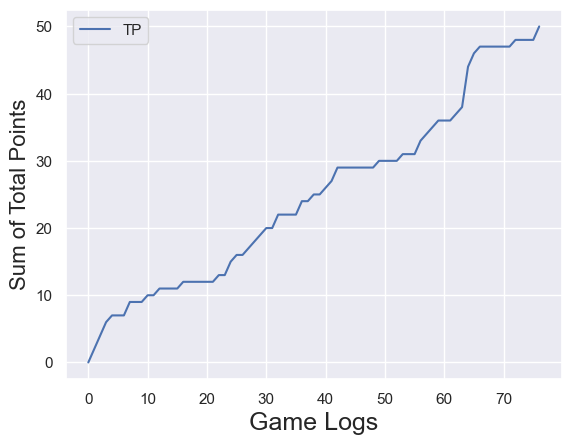

In [125]:
# Plot the timeseries

fig = plt.figure()
SlafPts.plot()
fig.suptitle('Cumulative Points Scored', fontsize=20)
plt.xlabel('Game Logs', fontsize=18)
plt.ylabel('Sum of Total Points', fontsize=16)

### Get a Rolling Average view

In [135]:
# Tail-rolling average transform
rolling = SlafPts.rolling(window=5)
rolling_mean = rolling.mean()

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/573390683.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = rolling.mean()


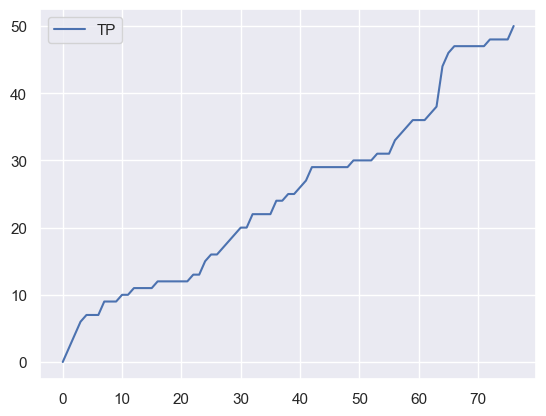

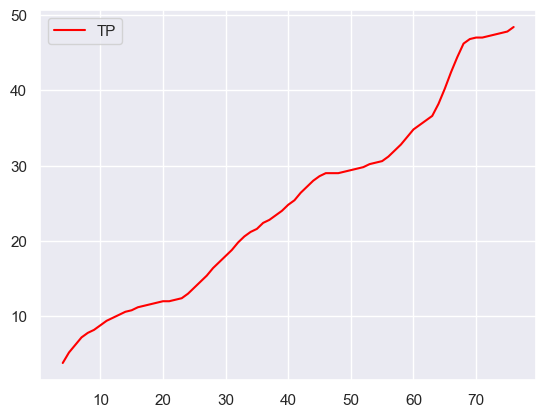

<Figure size 640x480 with 0 Axes>

In [136]:
# plot original and transformed dataset
SlafPts.plot()
rolling_mean.plot(color='red')
plt.show()
plt.tight_layout()